In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/Users/rishavmishra/Desktop/ML 2 FINAL project/sample_onlinefraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,10,CASH_OUT,51943.97,C1637626505,0.00,0.00,C303888116,382665.98,434609.95,0,0
1,8,PAYMENT,14851.71,C517827724,41858.00,27006.29,M2135203084,0.00,0.00,0,0
2,10,PAYMENT,13310.72,C887797881,936655.56,923344.84,M1386713236,0.00,0.00,0,0
3,8,TRANSFER,668736.87,C725736615,20318.00,0.00,C1247051677,83291.00,1681737.84,0,0
4,7,TRANSFER,584283.47,C108878855,698842.84,114559.37,C1373467808,65726.18,1031613.74,0,0
...,...,...,...,...,...,...,...,...,...,...,...
108208,351,TRANSFER,1552664.33,C1431338158,1552664.33,0.00,C1230205848,0.00,0.00,1,0
108209,1,TRANSFER,35063.63,C1364127192,35063.63,0.00,C1136419747,0.00,0.00,1,0
108210,8,PAYMENT,11577.90,C1983236161,525342.46,513764.56,M1667304777,0.00,0.00,0,0
108211,8,CASH_IN,64758.73,C474631120,51514.33,116273.06,C52620058,117989.32,53230.59,0,0


In [3]:
#Cleaning the duplicated rows
df[df.duplicated()].shape[0]

116

In [4]:
#Cleaning the duplicated rows
df.drop_duplicates(inplace=True)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,10,CASH_OUT,51943.97,C1637626505,0.00,0.00,C303888116,382665.98,434609.95,0,0
1,8,PAYMENT,14851.71,C517827724,41858.00,27006.29,M2135203084,0.00,0.00,0,0
2,10,PAYMENT,13310.72,C887797881,936655.56,923344.84,M1386713236,0.00,0.00,0,0
3,8,TRANSFER,668736.87,C725736615,20318.00,0.00,C1247051677,83291.00,1681737.84,0,0
4,7,TRANSFER,584283.47,C108878855,698842.84,114559.37,C1373467808,65726.18,1031613.74,0,0
...,...,...,...,...,...,...,...,...,...,...,...
108207,8,PAYMENT,3129.77,C1311543068,320243.41,317113.64,M1613667542,0.00,0.00,0,0
108208,351,TRANSFER,1552664.33,C1431338158,1552664.33,0.00,C1230205848,0.00,0.00,1,0
108210,8,PAYMENT,11577.90,C1983236161,525342.46,513764.56,M1667304777,0.00,0.00,0,0
108211,8,CASH_IN,64758.73,C474631120,51514.33,116273.06,C52620058,117989.32,53230.59,0,0


In [5]:
# We can see that suspected fraud can only be found in the 'cash out' and 'Transfer' transaction type
df.groupby('type')['isFraud'].value_counts()

type      isFraud
CASH_IN   0          20185
CASH_OUT  0          30659
          1           4116
DEBIT     0            988
PAYMENT   0          39512
TRANSFER  0           8540
          1           4097
Name: count, dtype: int64

In [6]:
#Checking the null values
df.isnull().sum().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64>

<Figure size 1200x900 with 0 Axes>

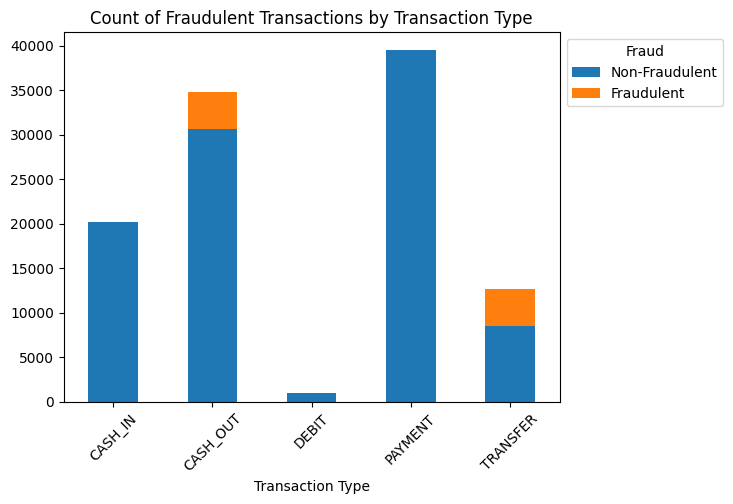

In [7]:
# Countplot for Fraudulent Transactions by Transaction Type with Data Labels Above Bars
plt.figure(figsize=(12, 9))
fraud_count = df.groupby(['type', 'isFraud']).size().unstack()
fraud_count.plot(kind='bar', stacked=True)


plt.title('Count of Fraudulent Transactions by Transaction Type')
plt.xlabel('Transaction Type')
plt.xticks(rotation=45)
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'], bbox_to_anchor=(1, 1))
plt.show()

As we can see there is the class imbalance problem in classification of the data, i.e., there are only 8213 0s out of the 108097 rows. so we need to do the oversampling, which will be done after few steps.

In [8]:
#Removing the irrelevant columns and creating the input dataframe
X=df.drop(['step','nameOrig','nameDest','isFlaggedFraud','isFraud'],axis=1)
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,CASH_OUT,51943.97,0.00,0.00,382665.98,434609.95
1,PAYMENT,14851.71,41858.00,27006.29,0.00,0.00
2,PAYMENT,13310.72,936655.56,923344.84,0.00,0.00
3,TRANSFER,668736.87,20318.00,0.00,83291.00,1681737.84
4,TRANSFER,584283.47,698842.84,114559.37,65726.18,1031613.74
...,...,...,...,...,...,...
108207,PAYMENT,3129.77,320243.41,317113.64,0.00,0.00
108208,TRANSFER,1552664.33,1552664.33,0.00,0.00,0.00
108210,PAYMENT,11577.90,525342.46,513764.56,0.00,0.00
108211,CASH_IN,64758.73,51514.33,116273.06,117989.32,53230.59


In [9]:
#Creating the dummy variable for the column 'type' and removing the dummy trap by drop_first=True
X=pd.get_dummies(X,drop_first=True,dtype=int)
X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,51943.97,0.00,0.00,382665.98,434609.95,1,0,0,0
1,14851.71,41858.00,27006.29,0.00,0.00,0,0,1,0
2,13310.72,936655.56,923344.84,0.00,0.00,0,0,1,0
3,668736.87,20318.00,0.00,83291.00,1681737.84,0,0,0,1
4,584283.47,698842.84,114559.37,65726.18,1031613.74,0,0,0,1
...,...,...,...,...,...,...,...,...,...
108207,3129.77,320243.41,317113.64,0.00,0.00,0,0,1,0
108208,1552664.33,1552664.33,0.00,0.00,0.00,0,0,0,1
108210,11577.90,525342.46,513764.56,0.00,0.00,0,0,1,0
108211,64758.73,51514.33,116273.06,117989.32,53230.59,0,0,0,0


In [10]:
# Standardising the input data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X)

In [11]:
X=pd.DataFrame(x,columns=X.columns)
X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-0.269534,-0.339667,-0.315259,-0.190113,-0.260949,1.452057,-0.096043,-0.759014,-0.363841
1,-0.315059,-0.324489,-0.305143,-0.343920,-0.410713,-0.688678,-0.096043,1.317498,-0.363841
2,-0.316951,-0.000036,0.030589,-0.343920,-0.410713,-0.688678,-0.096043,1.317498,-0.363841
3,0.487486,-0.332299,-0.315259,-0.310443,0.168804,-0.688678,-0.096043,-0.759014,2.748456
4,0.383832,-0.086267,-0.272350,-0.317503,-0.055225,-0.688678,-0.096043,-0.759014,2.748456
...,...,...,...,...,...,...,...,...,...
108092,-0.329446,-0.223547,-0.196481,-0.343920,-0.410713,-0.688678,-0.096043,1.317498,-0.363841
108093,1.572373,0.223329,-0.315259,-0.343920,-0.410713,-0.688678,-0.096043,-0.759014,2.748456
108094,-0.319077,-0.149178,-0.122823,-0.343920,-0.410713,-0.688678,-0.096043,1.317498,-0.363841
108095,-0.253806,-0.320988,-0.271708,-0.296496,-0.392370,-0.688678,-0.096043,-0.759014,-0.363841


In [12]:
# Creating the output variable
y=df['isFraud']
y

0         0
1         0
2         0
3         0
4         0
         ..
108207    0
108208    1
108210    0
108211    0
108212    0
Name: isFraud, Length: 108097, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
# importing the neural network
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(max_iter=25,random_state=1,activation='relu',solver='lbfgs')

In [15]:
# importing the Logistic Regression 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs',max_iter=25)

In [16]:
# importing the support vector machine and then using hyper parameter tuning to find which kernel is most suitable
from sklearn import svm
from sklearn.model_selection import GridSearchCV
gsc=GridSearchCV(svm.SVC(gamma='auto'),{'kernel':['rbf','linear']},cv=3,return_train_score=False)

In [17]:
gsc.fit(X,y)

GridSearchCV(cv=3, estimator=SVC(gamma='auto'),
             param_grid={'kernel': ['rbf', 'linear']})

In [18]:
gsc.best_params_

{'kernel': 'rbf'}

In [19]:
# since kernel 'rbf' came out to be the best parameter during hyper parameter tuning so, we will use this
sv=svm.SVC(gamma='auto',kernel='rbf')

In [20]:
# importing Random forest classifier and using 20 decision trees
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20)

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
# doing the oversampling to create the decent ratio between both classifications 1 and 0 in the training set
sm=SMOTE(random_state=12,sampling_strategy=0.6)

In [23]:
#over sampled training set
X_train_res,y_train_res=sm.fit_resample(X_train,y_train)

In [24]:
df_resampled=pd.concat([X_train_res,y_train_res], axis=1)
df_resampled

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
0,-0.318882,-0.285512,-0.263714,-0.343920,-0.410713,-0.688678,-0.096043,1.317498,-0.363841,0
1,-0.292170,-0.327669,-0.315259,0.839156,0.699662,-0.688678,-0.096043,-0.759014,2.748456,0
2,0.650438,-0.337653,-0.315259,0.162125,0.969901,-0.688678,-0.096043,-0.759014,2.748456,0
3,-0.165629,5.150723,5.407393,-0.166381,-0.315115,-0.688678,-0.096043,-0.759014,-0.363841,0
4,0.988248,0.050759,-0.315259,-0.343920,-0.410713,-0.688678,-0.096043,-0.759014,2.748456,1
...,...,...,...,...,...,...,...,...,...,...
107139,0.151974,-0.196304,-0.315259,-0.247539,-0.191839,1.452057,-0.096043,-0.759014,-0.363841,1
107140,-0.211939,-0.303816,-0.315259,-0.343920,-0.410713,-0.688678,-0.096043,-0.759014,2.748456,1
107141,11.940201,3.286328,-0.315259,-0.343920,3.035233,1.452057,-0.096043,-0.759014,-0.363841,1
107142,9.734739,2.634762,-0.315259,-0.307582,2.447174,1.452057,-0.096043,-0.759014,-0.363841,1


In [25]:
# as we can see there is 1:0.6 ratio between the both classifications i.e. 0 & 1 which seems pretty decent 
df_resampled['isFraud'].value_counts()

isFraud
0    66965
1    40179
Name: count, dtype: int64

In [26]:
# using cross validation to check the score of each machine learning model and judge which one is the best
from sklearn.model_selection import cross_val_score

In [27]:
# using cross validation to find the score of neural network model
mlp_score=cross_val_score(mlp,X_train_res,y_train_res,cv=5)
mlp_score

/Users/rishavmishra/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/rishavmishra/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/rishavmishra/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs faile

array([0.92897475, 0.92589482, 0.9234682 , 0.92001493, 0.91333769])

In [28]:
# The average score of the neural network model
avg_mlp_score=np.mean(mlp_score)
avg_mlp_score

0.9223380777235428

In [29]:
# using cross validation to find the score of logistic regression model
lr_score=cross_val_score(lr,X_train_res,y_train_res,cv=5)
lr_score

/Users/rishavmishra/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rishavmishra/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

array([0.92762145, 0.92860143, 0.92766811, 0.91903495, 0.92150457])

In [30]:
# The average score of the logistic regression model
avg_lr_score=np.mean(lr_score)
avg_lr_score

0.9248861029872926

In [31]:
# using cross validation to find the score of support vector classification model
sv_score=cross_val_score(sv,X_train_res,y_train_res,cv=5)

In [32]:
sv_score

array([0.9319147 , 0.93280134, 0.93569462, 0.92948808, 0.93321822])

In [33]:
# The average score of the support vector classification model
avg_sv_score=np.mean(sv_score)
avg_sv_score

0.9326233909022275

In [34]:
# using cross validation to find the score of random forest classification model
rf_score=cross_val_score(rf,X_train_res,y_train_res,cv=5)
rf_score

array([0.99654674, 0.99738672, 0.99710672, 0.99678006, 0.99757327])

In [35]:
# The average score of the random forest classification model
avg_rf_score=np.mean(rf_score)
avg_rf_score

0.9970787024431249

We can see using the cross validation method we found out that Random forest classifier is most suitable to this data in predicting the result with accuracy of 99.67%

In [36]:
#training the neural network model 
mlp.fit(X_train_res,y_train_res)


/Users/rishavmishra/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(max_iter=25, random_state=1, solver='lbfgs')

In [37]:
#training the logistic regression model
lr.fit(X_train_res,y_train_res)

/Users/rishavmishra/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=25)

In [38]:
#training the support vector classifier 
sv.fit(X_train_res,y_train_res)

SVC(gamma='auto')

In [39]:
#training the random forest classifier
rf.fit(X_train_res,y_train_res)

RandomForestClassifier(n_estimators=20)

In [40]:
#predicting for the neural network model
mlp_y_train_predict=mlp.predict(X_train_res)
mlp_y_test_predict=mlp.predict(X_test)

In [41]:
#predicting for the logistic regression model
lr_y_train_predict=lr.predict(X_train_res)
lr_y_test_predict=lr.predict(X_test)

In [42]:
#predicting for the support vector classifier 
sv_y_train_predict=sv.predict(X_train_res)
sv_y_test_predict=sv.predict(X_test)

In [43]:
#predicting for the random forest classifier 
rf_y_train_predict=rf.predict(X_train_res)
rf_y_test_predict=rf.predict(X_test)

In [44]:
# classification report for the neural network for the training set
from sklearn.metrics import classification_report
print(classification_report(y_train_res,mlp_y_train_predict))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     66965
           1       0.91      0.88      0.89     40179

    accuracy                           0.92    107144
   macro avg       0.92      0.91      0.91    107144
weighted avg       0.92      0.92      0.92    107144



In [45]:
# classification report for the neural network for the test set
print(classification_report(y_test,mlp_y_test_predict))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     32919
           1       0.57      0.87      0.69      2754

    accuracy                           0.94     35673
   macro avg       0.78      0.91      0.83     35673
weighted avg       0.96      0.94      0.95     35673



In [46]:
# classification report for the logistic regression for the training set
print(classification_report(y_train_res,lr_y_train_predict))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     66965
           1       0.91      0.88      0.90     40179

    accuracy                           0.92    107144
   macro avg       0.92      0.92      0.92    107144
weighted avg       0.92      0.92      0.92    107144



In [47]:
# classification report for the logistic regression for the test set
print(classification_report(y_test,lr_y_test_predict))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     32919
           1       0.59      0.88      0.71      2754

    accuracy                           0.94     35673
   macro avg       0.79      0.91      0.84     35673
weighted avg       0.96      0.94      0.95     35673



In [48]:
# classification report for the support vector for the training set
print(classification_report(y_train_res,sv_y_train_predict))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     66965
           1       0.97      0.86      0.91     40179

    accuracy                           0.94    107144
   macro avg       0.94      0.92      0.93    107144
weighted avg       0.94      0.94      0.94    107144



In [49]:
# classification report for the support vector for the test set
print(classification_report(y_test,sv_y_test_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     32919
           1       0.80      0.85      0.82      2754

    accuracy                           0.97     35673
   macro avg       0.90      0.91      0.90     35673
weighted avg       0.97      0.97      0.97     35673



In [50]:
# classification report for the random forest classifier for the training set
print(classification_report(y_train_res,rf_y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66965
           1       1.00      1.00      1.00     40179

    accuracy                           1.00    107144
   macro avg       1.00      1.00      1.00    107144
weighted avg       1.00      1.00      1.00    107144



In [51]:
# classification report for the random forest classifier for the test set
print(classification_report(y_test,rf_y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32919
           1       0.97      0.99      0.98      2754

    accuracy                           1.00     35673
   macro avg       0.98      0.99      0.99     35673
weighted avg       1.00      1.00      1.00     35673



as we can see from the above the random forest classifier is most sutitable for the data, which predicts with highest accuracy out of all model.